# Práctica 5: Simulación (Primera parte)

En esta práctica vamos a simular varios experimentos aleatorios y vamos a utilizar dichas simulaciones para experimentar y comparar los métodos frecuentista y bayesiano a la hora de asignar un valor a un la probabilidad de un suceso, cuando el experimento se puede repetir tantas veces como uno desee, de manera independiente. 


<font color='blue'>


<strong>1. Uso de `random.choices()`</strong>

Usa <strong>`random.choices()`</strong> para:

a) Simular una moneda  
b) Simular un dado  
c) Simular una moneda en la que \( P(\text{cara}) = 0.4 \)  
d) Repetir el experimento dado en c) 1000 veces y estudiar la proporción de caras y cruces  

---

<strong>2. Urnas</strong>

Tenemos 3 urnas llamadas $U_1$, $U_2$ y $U_3$:

- $U_1$: 2 bolas rojas y 4 blancas  
- $U_2$: 5 rojas y 2 blancas  
- $U_3$: 4 rojas y 3 blancas  

a) Si cojo una urna al azar y de ella saco una bola, ¿cuál es $P(R)$?  
b) Haz un programa que simule la situación dada en a). Esto es, que escoja al azar una urna y, dentro de esa urna, elija al azar una bola.  
c) Ejecuta el programa 1000 veces y calcula la frecuencia con la que la bola elegida es roja. Compara el resultado con a).  
d) Repite lo anterior si cogemos 2 bolas y queremos calcular $P(2\ \text{rojas})$.  

---

<strong>3. Probabilidad condicionada con urnas</strong>

Tenemos las mismas urnas que en el ejercicio 2.

a) Calcula $P(U_1 \mid R)$.  
b) Haz un programa que escoja al azar una urna y, dentro de esa urna, elija al azar una bola.  
c) Repite el experimento 1000 veces y almacena las urnas y bolas en un <strong>data.frame</strong>.  
d) Filtra el <strong>data.frame</strong> anterior para quedarte con aquellos casos en los que salió bola roja. Calcula en cuántos de esos casos habíamos usado la urna U1. Compara con a).  
    
---

<strong>4. Repite los dos ejercicios anteriores cambiando la composicion de las urnas. Ahora la urna U1
    tiene 13 bolas rojas y 10 blancas, U2 tiene 9 rojas y 12 blancas y U3 tiene 14R y 8B.</strong>

    
<strong> 5. El problema de Monty Hall </strong>

Se trata de un ejemplo clásico de razonamiento probabilistico. Tenemos un concurso televisivo, y hay tres puertas:
- Detrás de una hay un coche.
- Detrás de las otras dos hay cabras.

El concursante elige una puerta al azar.
Después, el presentador del programa (que sabe dónde está el coche):
- abre **una de las otras dos puertas**
- siempre muestra una cabra
- y ofrece al concursante **cambiar de puerta**.

La pregunta es:
* ¿Conviene cambiar la elección inicial?

* Discutir el problema de Monty Hall en pizarra, sin llegar a resolverlo. Que los alumnos opinen qué debe suceder. 

* Simular el experimento descrito por el problema de Monty Hall y obtener una estimación aproximada de la probabilidad de ganar en cada uno de los casos: cambiamos de puerta o no lo hacemos. 
    
</font>


### Solución: 

<span style="color:blue">Ej 1. Usa `random.choices()` para:</span>

<span style="color:blue">a) Simular una moneda.</span>


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

In [18]:
moneda = ["cara", "cruz"]
resultado = np.random.choice(moneda)
print("a) Moneda:", resultado)


a) Moneda: cruz


<span style="color:blue">b) Simular un dado.</span>

In [19]:
dado = [1,2,3,4,5,6]
resultado = random.choice(dado)
print("Resultado del dado:", resultado)


Resultado del dado: 6


<span style="color:blue">c) Simular una moneda con P(cara) = 0.4</span>

In [20]:
moneda = ["cara", "cruz"]
resultado = np.random.choice(moneda, p=[0.4, 0.6])
print("c) Moneda sesgada:", resultado)


c) Moneda sesgada: cruz


<span style="color:blue">d) Repite el experimento de c) 1000 veces y estudia la proporción.</span>

In [21]:
from collections import Counter

moneda = ["cara", "cruz"]
resultados = np.random.choice(moneda, size=1000, p=[0.4, 0.6])
proporcion = dict(Counter(resultados))
print("d) Proporciones:", {k: v/1000 for k, v in proporcion.items()})


d) Proporciones: {'cruz': 0.611, 'cara': 0.389}


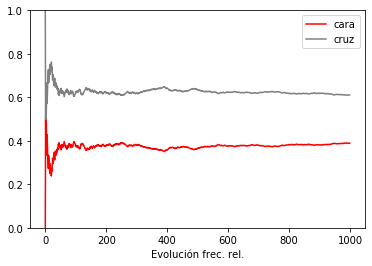

In [22]:
# Frecuencias acumuladas
frec_cara = []
frec_cruz = []
for i in range(1, 1001):
    muestra = resultados[:i]
    c = np.sum(muestra == "cara")
    z = np.sum(muestra == "cruz")
    frec_cara.append(c / i)
    frec_cruz.append(z / i)

plt.plot(frec_cara, label="cara", color="red")
plt.plot(frec_cruz, label="cruz", color="gray")
plt.ylim(0, 1)
plt.xlabel("Evolución frec. rel.")
plt.legend()
plt.show()

<font color='blue'> <strong> Ej 2. Tenemos 3 urnas. $U_1$ tiene 2 bolas rojas y 4 blancas, $U_2$ tiene 5 rojas y 2 blancas, y $U_3$ tiene 4 rojas  y 3 blancas.
* Si cojo una urna al azar y de ella saco una bola ¿cuál es P(R)?
    </strong> </font> 

Primero calculamos la Probabilidad de Roja sabiendo que la tomo de la urna  $U_1$: 

$$P(R|U_1)=2/6$$

Ahora calculamos la Probabilidad de Roja sabiendo que la tomo de la urna  $U_2$: 

$$P(R|U_2)=5/7$$

Y, finalmente, la Probabilidad de Roja sabiendo que la tomo de la urna $U_3:$ 

$$P(R|U_3)=4/7$$

Entonces aplicamos el teorema de la probabilidad total:

$$P(R)=(1/3)P(R|U_1)+(1/3)P(R|U_2)+(1/3)P(R|U_3)$$

    


In [23]:
PR_U1 = 2 / 6
PR_U2 = 5 / 7
PR_U3 = 4 / 7
PR = (1/3) * PR_U1 + (1/3) * PR_U2 + (1/3) * PR_U3
print("a) P(R):", PR)

a) P(R): 0.5396825396825397


<font color='blue'> <strong>  b) Simular experimento </strong> </font> 

Primero definimos las urnas:

In [24]:
U1 = ["R"] * 2 + ["B"] * 4
U2 = ["R"] * 5 + ["B"] * 2
U3 = ["R"] * 4 + ["B"] * 3

print("U1:",U1)
print("U2:",U2)
print("U3:",U3)

U1: ['R', 'R', 'B', 'B', 'B', 'B']
U2: ['R', 'R', 'R', 'R', 'R', 'B', 'B']
U3: ['R', 'R', 'R', 'R', 'B', 'B', 'B']


Ahora elegimos (aleatoriamente) la urna de la que vamos a extraer la bola 

In [25]:
urnas = [U1, U2, U3]
urna = random.choice(urnas)
print("Urna elegida",urna)

Urna elegida ['R', 'R', 'R', 'R', 'B', 'B', 'B']


In [26]:
# b) Simular experimento (corregido)
urnas = [U1, U2, U3]

indice_urna = np.random.choice([0, 1, 2])   # elección equiprobable
urna = urnas[indice_urna]
bola = np.random.choice(urna)

print("b) Urna elegida:", indice_urna + 1)
print("   Bola extraída:", bola)

b) Urna elegida: 3
   Bola extraída: B


Finalmente, extraemos la bola y la mostramos: 

In [27]:
bola = random.choice(urna)
print("b) Bola extraída:", bola)

b) Bola extraída: B


<font color='blue'> <strong> c) Ejecuta el programa 1000 veces y calcula la frecuencia con la que la bola elegida es roja. Compara el resultado con a)</strong> </font> 

In [28]:
# c) 1000 repeticiones (corregido)
bolas = []
for _ in range(1000):
    i = np.random.choice([0, 1, 2])   # elegir urna
    bola = np.random.choice(urnas[i])
    bolas.append(bola)

frecuencia_R = bolas.count("R") / len(bolas)
print("c) Frecuencia de bolas rojas:", frecuencia_R)

c) Frecuencia de bolas rojas: 0.548


In [29]:
# d) Dos bolas
def P2R(U):
    return (Counter(U)["R"] * (Counter(U)["R"] - 1)) / (len(U)*(len(U)-1))

P2R_U1 = P2R(U1)
P2R_U2 = P2R(U2)
P2R_U3 = P2R(U3)
P2R_total = (1/3)*P2R_U1 + (1/3)*P2R_U2 + (1/3)*P2R_U3
print("d) P(2 rojas):", P2R_total)

d) P(2 rojas): 0.2761904761904762


In [30]:
bolasRojas = []

for _ in range(1000):
    i = np.random.choice([0, 1, 2])   # elegir urna
    bolas_extraidas = np.random.choice(urnas[i], 2, replace=False)
    rojas = list(bolas_extraidas).count("R")
    bolasRojas.append(rojas)

frecuencia_2R = bolasRojas.count(2) / len(bolasRojas)
print("Frecuencia de 2 rojas:", frecuencia_2R)

Frecuencia de 2 rojas: 0.266


In [31]:
# Ejercicio 3
print("\nEjercicio 3:")

PU1_R = (PR_U1 * (1/3)) / PR
print("a) P(U1 | R):", PU1_R)




Ejercicio 3:
a) P(U1 | R): 0.20588235294117646


In [32]:
# b) Simular extracción de bola
i = random.choice([0,1,2])
urna = urnas[i]
bola = random.choice(urna)
print("b) Urna:", i + 1, "Bola:", bola)

b) Urna: 3 Bola: B


In [33]:
# c) 10000 repeticiones
urnasElegidas = []
bolasCogidas = []
for _ in range(10000):
    i = random.choice([0,1,2])
    bola = random.choice(urnas[i])
    urnasElegidas.append(i + 1)
    bolasCogidas.append(bola)

df = pd.DataFrame({"urnas": urnasElegidas, "bolas": bolasCogidas})
df

,urnas,bolas
0,3,B
1,1,B
2,3,B
3,1,R
4,2,R
...,...,...
9995,2,B
9996,2,R
9997,3,B
9998,2,R


In [34]:
# d) Filtrar por bolas rojas
df_rojas = df[df["bolas"] == "R"]
freq_U1_given_R = len(df_rojas[df_rojas["urnas"] == 1]) / len(df_rojas)
print("d) Frecuencia U1 dado R:", freq_U1_given_R)

d) Frecuencia U1 dado R: 0.20149393090569562


<font color='blue'> <strong> 4. Repite los dos ejercicios anteriores cambiando la composicion de las urnas. Ahora la urna U1
    tiene 13 bolas rojas y 10 blancas, U2 tiene 9 rojas y 12 blancas y U3 tiene 14R y 8B. </strong> </font> 

In [35]:
# Ejercicio 4: Algoritmo Bayesiano
print("\nEjercicio 4:")

U1 = ["R"] * 13 + ["B"] * 10
U2 = ["R"] * 9 + ["B"] * 12
U3 = ["R"] * 14 + ["B"] * 8

print("U1:",U1)
print("U2:",U2)
print("U3:",U3)

probRoja = np.array([13/23, 9/21, 14/22])
probBlanca = 1 - probRoja
probs = np.array([1/3, 1/3, 1/3])


Ejercicio 4:
U1: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
U2: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
U3: ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [36]:
# b) Elegir urna y extraer bolas
urnas = [U1, U2, U3]
numero = random.choice([0,1,2])
urna = urnas[numero]
bolas = np.random.choice(urna, 200, replace=True)
print(numero+1)
print(bolas)

2
['R' 'R' 'B' 'B' 'R' 'R' 'B' 'R' 'B' 'R' 'B' 'B' 'B' 'R' 'R' 'B' 'B' 'B'
 'B' 'B' 'B' 'R' 'R' 'R' 'B' 'B' 'B' 'R' 'B' 'B' 'R' 'R' 'B' 'B' 'B' 'B'
 'R' 'B' 'B' 'B' 'B' 'B' 'B' 'R' 'B' 'R' 'R' 'B' 'R' 'B' 'B' 'R' 'R' 'R'
 'B' 'B' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'B' 'R' 'B' 'R' 'R' 'B' 'B'
 'B' 'B' 'B' 'R' 'B' 'B' 'B' 'R' 'B' 'B' 'R' 'B' 'B' 'R' 'B' 'R' 'R' 'B'
 'B' 'B' 'R' 'B' 'B' 'R' 'B' 'B' 'B' 'B' 'B' 'B' 'R' 'B' 'R' 'R' 'B' 'R'
 'B' 'R' 'R' 'R' 'B' 'B' 'R' 'B' 'R' 'B' 'R' 'R' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'R' 'B' 'B' 'B' 'B' 'B' 'R' 'B' 'B' 'B' 'B' 'R' 'R' 'R' 'B' 'B' 'B'
 'B' 'R' 'B' 'R' 'B' 'B' 'B' 'R' 'B' 'B' 'B' 'B' 'B' 'R' 'B' 'B' 'B' 'R'
 'B' 'R' 'B' 'R' 'B' 'R' 'R' 'R' 'R' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'R' 'B' 'B' 'R' 'B' 'B' 'B' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'B' 'B' 'B' 'R'
 'B' 'B']


Urna elegida: 2
Probabilidades actualizadas: [2.61264352e-06 9.99997387e-01 5.09689303e-12]


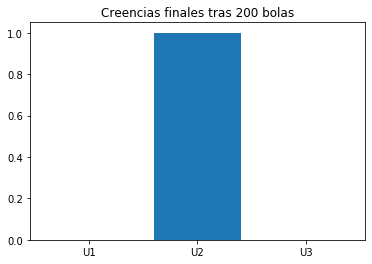

In [37]:
# c y d) Actualizar con Bayes
for bola in bolas:
    if bola == "R":
        probs *= probRoja
    else:
        probs *= probBlanca
    probs /= np.sum(probs)

print("Urna elegida:", numero+1)
print("Probabilidades actualizadas:", probs)
plt.bar(["U1", "U2", "U3"], probs)
plt.title("Creencias finales tras 200 bolas")
plt.show()

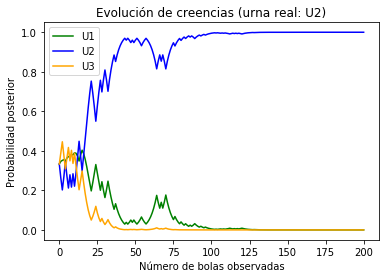

In [38]:
# e) Evolución de las creencias
probs = np.array([1/3, 1/3, 1/3])
evol = [probs.copy()]
for bola in bolas:
    if bola == "R":
        probs *= probRoja
    else:
        probs *= probBlanca
    probs /= np.sum(probs)
    evol.append(probs.copy())

evol = np.array(evol)
plt.plot(evol[:, 0], label="U1", color="green")
plt.plot(evol[:, 1], label="U2", color="blue")
plt.plot(evol[:, 2], label="U3", color="orange")
plt.legend()
plt.title(f"Evolución de creencias (urna real: U{numero+1})")
plt.xlabel("Número de bolas observadas")
plt.ylabel("Probabilidad posterior")
plt.show()

In [39]:
print("Frecuencia empírica de rojas:", list(bolas).count("R")/len(bolas))

Frecuencia empírica de rojas: 0.38


In [40]:
print("Modelo:")
print("U1:", 13/23)
print("U2:", 9/21)
print("U3:", 14/22)

Modelo:
U1: 0.5652173913043478
U2: 0.42857142857142855
U3: 0.6363636363636364


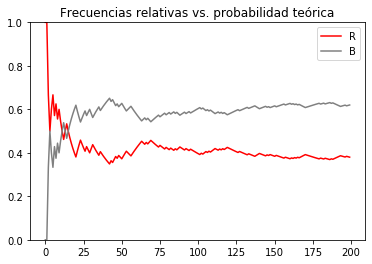

In [41]:

# f) Enfoque frecuentista
frecuencia_rojas = []
frecuencia_blancas = []
for i in range(1, 201):
    frecuencia_rojas.append(list(bolas[:i]).count("R") / i)
    frecuencia_blancas.append(list(bolas[:i]).count("B") / i)

plt.plot(frecuencia_rojas, label="R", color="red")
plt.plot(frecuencia_blancas, label="B", color="gray")
plt.title("Frecuencias relativas vs. probabilidad teórica")
plt.legend()
plt.ylim(0, 1)
plt.show()


<font color='blue'>  <strong>5. El problema de Monty Hall </strong>

Se trata de un ejemplo clásico de razonamiento probabilistico. Tenemos un concurso televisivo, y hay tres puertas:
- Detrás de una hay un coche.
- Detrás de las otras dos hay cabras.

El concursante elige una puerta al azar.
Después, el presentador del programa (que sabe dónde está el coche):
- abre **una de las otras dos puertas**
- siempre muestra una cabra
- y ofrece al concursante **cambiar de puerta**.

La pregunta es:

> ¿Conviene cambiar la elección inicial?

</font> 
<font color='blue'> <strong> Discutir el problema de Monty Hall en pizarra, sin llegar a resolverlo. Que los alumnos opinen qué debe suceder. </strong> </font> 

<font color='blue'> <strong> Simular el experimento descrito por el problema de Monty Hall y obtener una estimación aproximada de la probabilidad de ganar en cada uno de los casos: cambiamos de puerta o no lo hacemos. </strong> </font>

In [42]:
def monty_hall(n=10000, cambiar=True):
    gana = 0

    for _ in range(n):
        # 0 = cabra, 1 = coche
        puertas = np.array([0, 0, 1])
        np.random.shuffle(puertas)

        eleccion = np.random.choice([0, 1, 2])

        # Monty abre una puerta con cabra que no sea la elegida
        posibles = [i for i in range(3) if i != eleccion and puertas[i] == 0]
        abierta = np.random.choice(posibles)

        if cambiar:
            # cambiar a la única puerta restante
            eleccion_final = [i for i in range(3) if i not in (eleccion, abierta)][0]
        else:
            eleccion_final = eleccion

        if puertas[eleccion_final] == 1:
            gana += 1

    return gana / n


N = 10000
print("Probabilidad de ganar SIN cambiar:", monty_hall(N, cambiar=False))
print("Probabilidad de ganar CAMBIANDO:", monty_hall(N, cambiar=True))

Probabilidad de ganar SIN cambiar: 0.3355
Probabilidad de ganar CAMBIANDO: 0.6707


<font color='blue'> <strong>  Explicar el resultado, ya de forma teórica. </strong> </font>

## Explicación: 

### Paso 1: Elección inicial

Al elegir una puerta al principio:
- la probabilidad de haber elegido el coche es \(1/3\)
- la probabilidad de haber elegido una cabra es \(2/3\)

---

### Paso 2: Intervención del presentador

El presentador **no actúa al azar**:
- nunca abre la puerta elegida por el concursante
- nunca abre la puerta con el coche

Por tanto, su acción **aporta información**.

---

### Paso 3: Decisión final

- Si el concursante **NO cambia**, gana solo si acertó al principio:
$$P(\text{ganar sin cambiar}) = \tfrac{1}{3}$$

- Si el concursante **CAMBIA**, gana siempre que **inicialmente eligió una cabra**:

  $$P(\text{ganar cambiando}) = \tfrac{2}{3}$$


---

## Idea clave

El error intuitivo habitual es olvidar que el presentador **condiciona su elección**.
No elimina una puerta al azar: elimina información de forma sesgada.